In [1]:
import os
import tarfile
from six.moves import urllib
import random
from zipfile import ZipFile

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Exploratory Data Analysis (EDA)**

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
df['Sex']= df['Sex'].replace(['female','male'],[1,2])

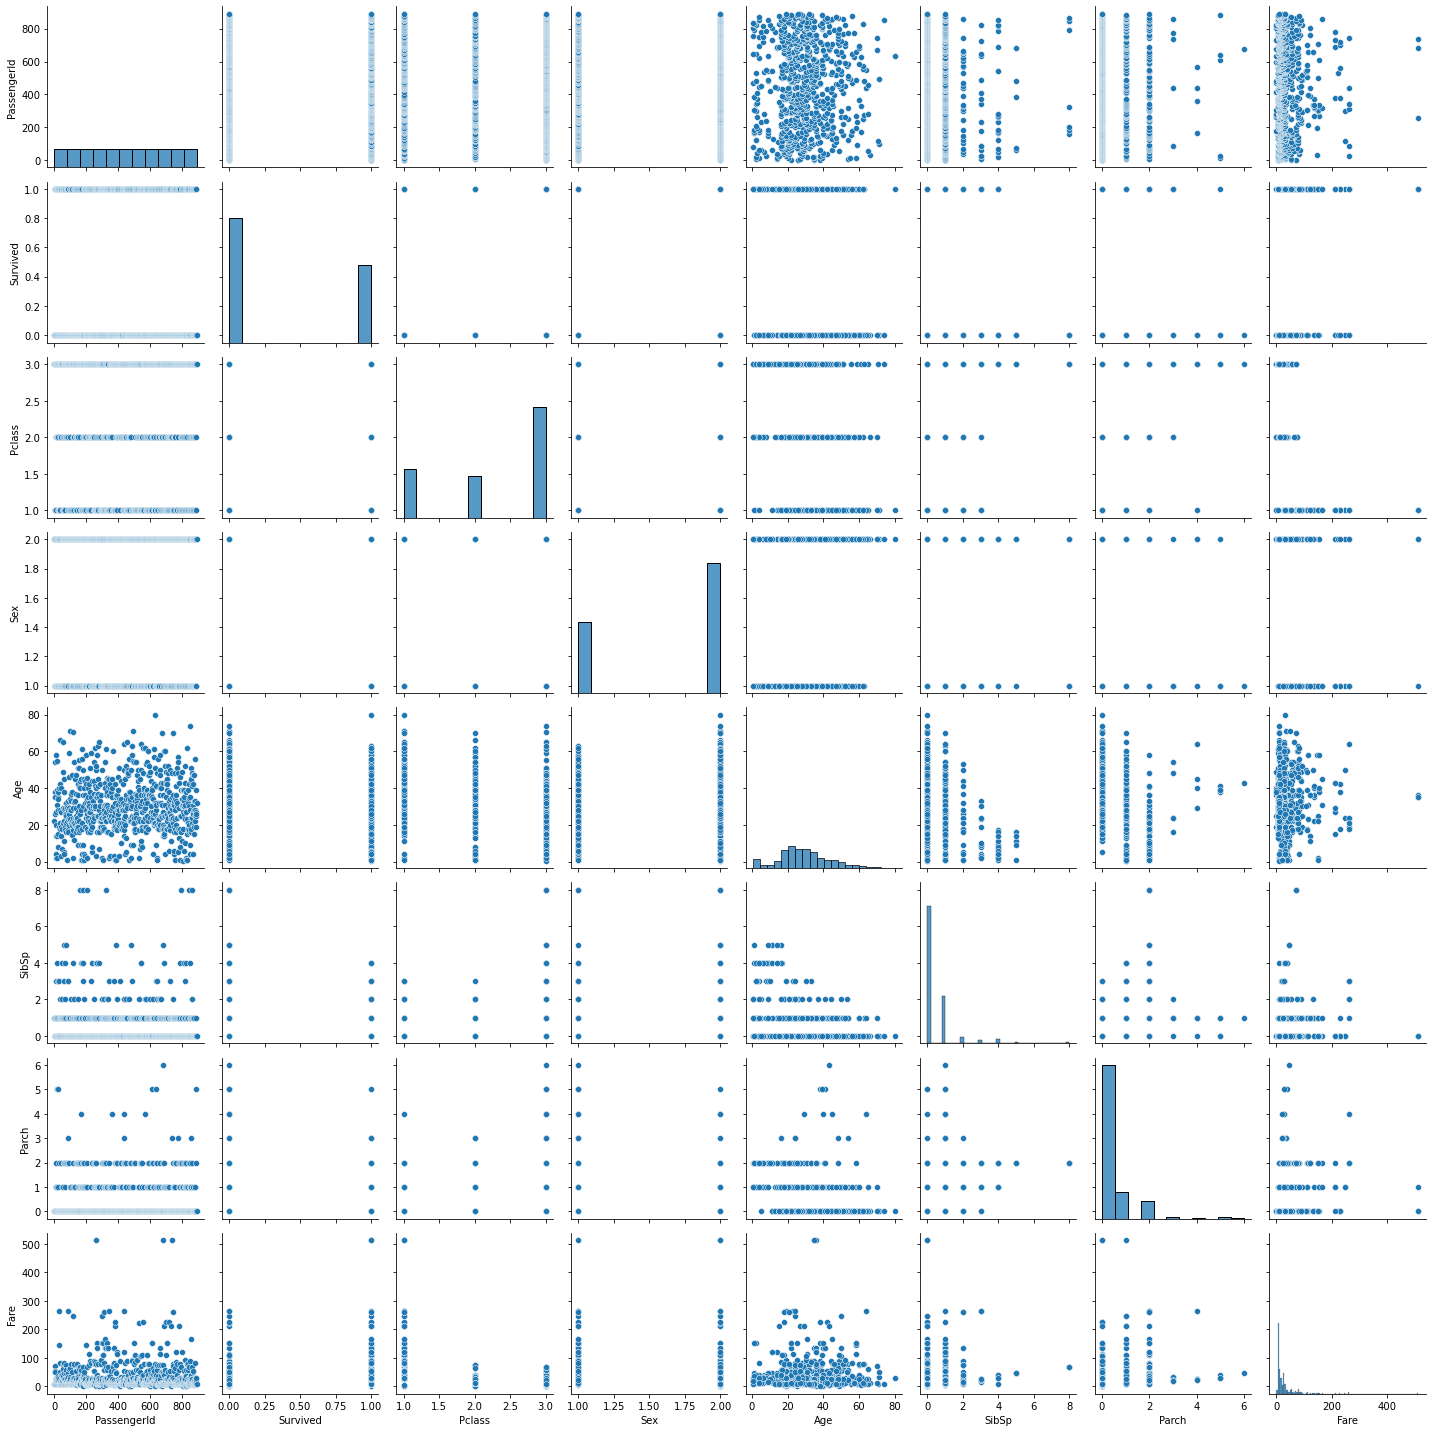

In [10]:
sns.pairplot(df, height=2.5)
plt.tight_layout()

In [11]:
survival = df['Survived'].value_counts()
survival

0    549
1    342
Name: Survived, dtype: int64

In [12]:
#survival_rate
survival_rate = survival[1]/len(df['Survived'])
survival_rate

0.3838383838383838

In [13]:
survived = (df[df['Survived'] == True])
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [14]:
survived['Sex'].value_counts() # more female (233) survived than men (109)

1    233
2    109
Name: Sex, dtype: int64

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [16]:
df_tit = df.copy()

In [17]:
df_tit.columns.get_loc("Age")

5

In [18]:
transformer = ColumnTransformer(
[('imp_col_age', SimpleImputer(strategy='mean'), [5])])

In [19]:
df_tit['Age'] = pd.DataFrame(transformer.fit_transform(df_tit))

In [20]:
df_tit['Age'] = df_tit['Age'].map('{:,.0f}'.format)

In [21]:
df_tit['Age'] = df_tit['Age'].astype(int)
df_tit['Fare'] = df_tit['Fare'].astype(int)

In [22]:
df_tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df_tit[df_tit['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",1,15,0,0,2667,7,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56,0,1,11767,83,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",1,25,0,1,230433,26,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30,B42,S


In [24]:
df_tit['Age'].min()

0

In [25]:
df_tit.loc[(df_tit['Survived'] == 0) & (df_tit['Sex'] == 2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22,1,0,A/5 21171,7,NaN,S
4,5,0,3,"Allen, Mr. William Henry",2,35,0,0,373450,8,NaN,S
5,6,0,3,"Moran, Mr. James",2,30,0,0,330877,8,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",2,54,0,0,17463,51,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",2,2,3,1,349909,21,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",2,33,0,0,349257,7,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",2,28,0,0,C.A./SOTON 34068,10,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",2,25,0,0,SOTON/OQ 392076,7,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",2,27,0,0,211536,13,NaN,S


In [26]:
pal = sns.color_palette()
pal.as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [27]:
print(pal.as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [28]:
from IPython.display import set_matplotlib_formats

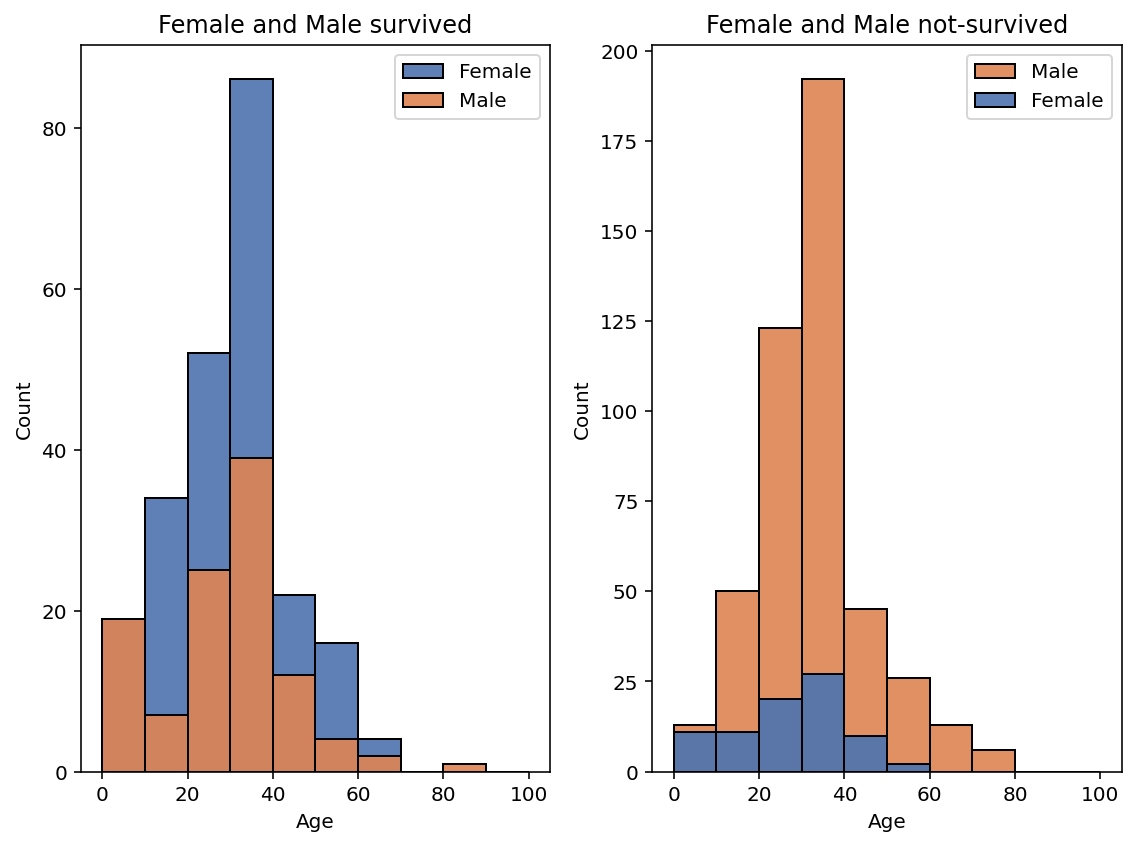

In [29]:
#had to convert age column from float to integers to have it correctly print histplot
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80 ,90, 100]

palette = {
    1: '#4c72b0', #standard blue
    2: '#dd8452' #standard orange
}

#sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
set_matplotlib_formats('retina')

fig, axes = plt.subplots(1, 2, figsize=(8,6))

hue_order_ax0 = [2, 1]
hue_order_ax1 = [1, 2]

sns.histplot(ax=axes[0], x='Age', data=df_tit[(df_tit['Survived'] == 1)],
             hue='Sex', bins=bins, alpha = 0.9, hue_order = hue_order_ax0, palette=palette);
sns.histplot(ax=axes[1], x='Age', data=df_tit[(df_tit['Survived'] == 0)],
             hue='Sex', bins=bins, alpha = 0.9, hue_order = hue_order_ax1, palette=palette);
#hue_order = hue_order
axes[0].set_title('Female and Male survived')
axes[1].set_title('Female and Male not-survived')
axes[0].legend(['Female', 'Male'])
axes[1].legend(['Male', 'Female'])
fig.tight_layout()


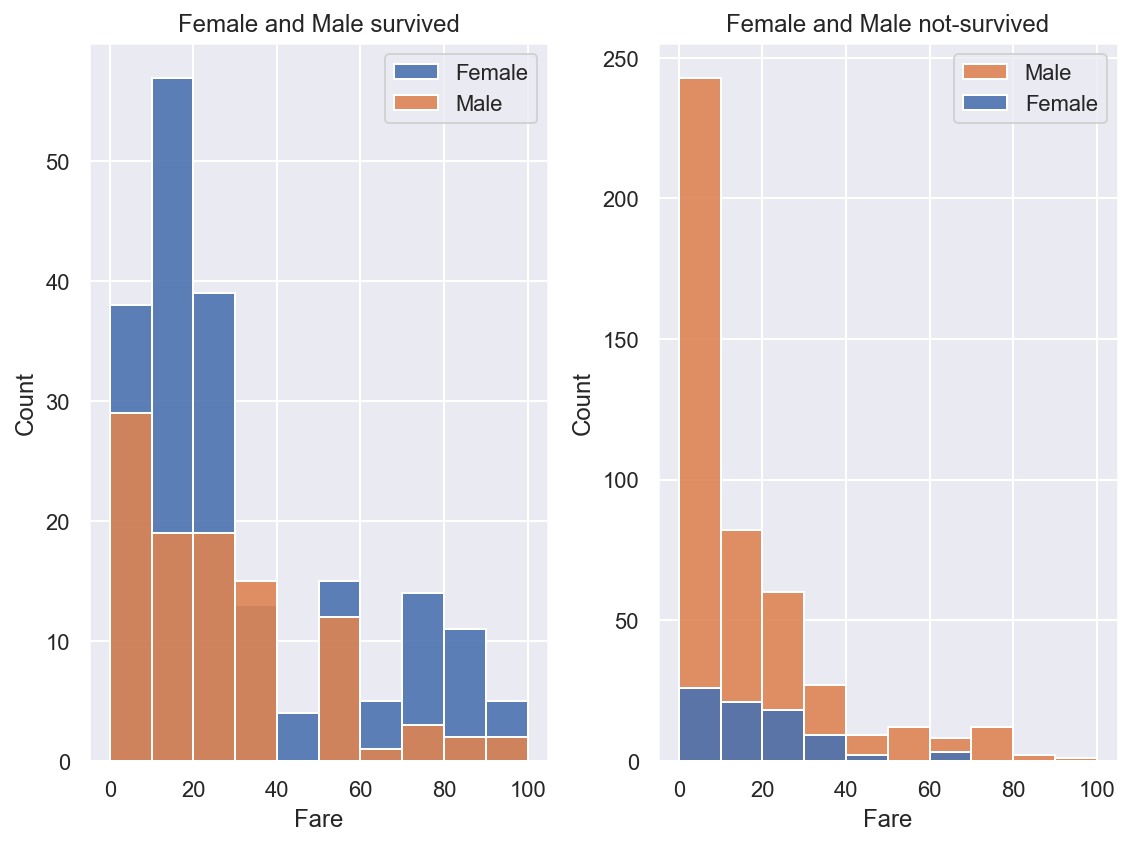

In [30]:
#had to convert age column from float to integers to have it correctly print histplot
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80 ,90, 100]

palette = {
    1: '#4c72b0', #standard blue
    2: '#dd8452' #standard orange
}

sns.set()
set_matplotlib_formats('retina')
fig, axes = plt.subplots(1, 2, figsize=(8,6))

hue_order_ax0 = [2, 1]
hue_order_ax1 = [1, 2]

sns.histplot(ax=axes[0], x='Fare', data=df_tit[(df_tit['Survived'] == 1)],
             hue='Sex', bins=bins, alpha = 0.9, hue_order = hue_order_ax0, palette=palette);
sns.histplot(ax=axes[1], x='Fare', data=df_tit[(df_tit['Survived'] == 0)],
             hue='Sex', bins=bins, alpha = 0.9, hue_order = hue_order_ax1, palette=palette);
#hue_order = hue_order
axes[0].set_title('Female and Male survived')
axes[1].set_title('Female and Male not-survived')
axes[0].legend(['Female', 'Male'])
axes[1].legend(['Male', 'Female'])
fig.tight_layout()



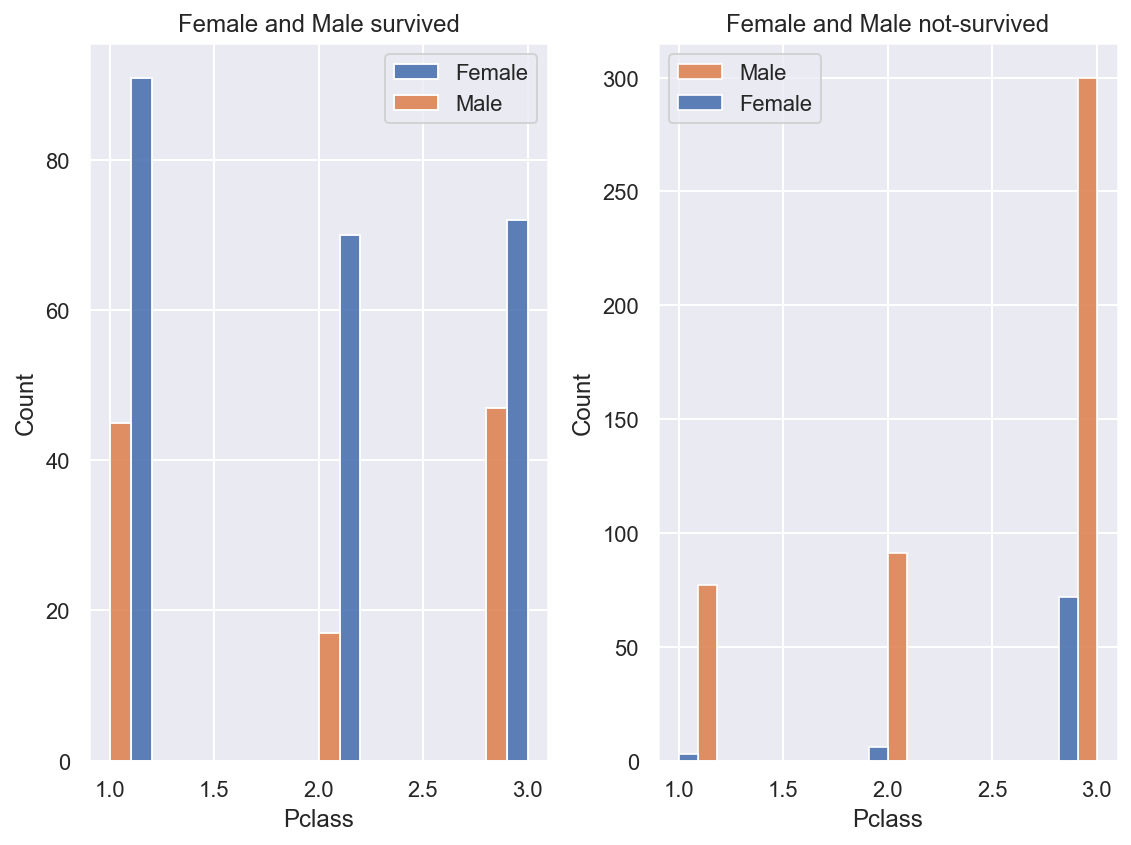

In [31]:
#had to convert age column from float to integers to have it correctly print histplot


palette = {
    1: '#4c72b0', #standard blue
    2: '#dd8452' #standard orange
}

sns.set()
set_matplotlib_formats('retina')
fig, axes = plt.subplots(1, 2, figsize=(8,6))

hue_order_ax0 = [2, 1]
hue_order_ax1 = [1, 2]

sns.histplot(ax=axes[0], x='Pclass', data=df_tit[(df_tit['Survived'] == 1)],
             hue='Sex', alpha = 0.9, hue_order = hue_order_ax0, palette=palette, multiple='dodge');
sns.histplot(ax=axes[1], x='Pclass', data=df_tit[(df_tit['Survived'] == 0)],
             hue='Sex', alpha = 0.9, hue_order = hue_order_ax1, palette=palette, multiple='dodge');
#hue_order = hue_order
axes[0].set_title('Female and Male survived')
axes[1].set_title('Female and Male not-survived')
axes[0].legend(['Female', 'Male'])
axes[1].legend(['Male', 'Female'])

fig.tight_layout()


In [32]:
df_male=df_tit[(df_tit['Sex']==2)]

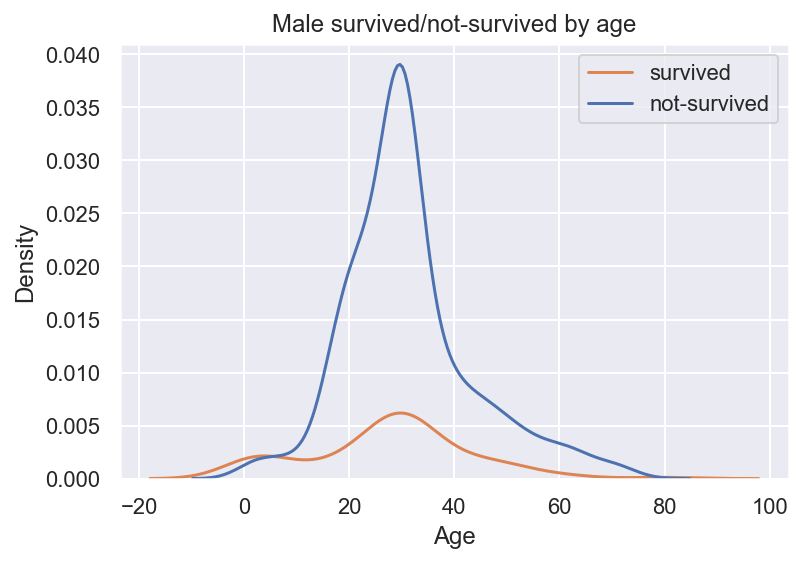

In [33]:
sns.set()
fig, ax = plt.subplots()

sns.kdeplot(x='Age', data=df_male, hue='Survived')
ax.legend(['survived', 'not-survived'])
ax.set_title('Male survived/not-survived by age');

In [34]:
print("Skewness: %f" % df_tit['Age'].skew())
print("Kurtosis: %f" % df_tit['Age'].kurt())

Skewness: 0.422075
Kurtosis: 0.954316


In [35]:
df_female=df_tit[(df_tit['Sex']==1)]

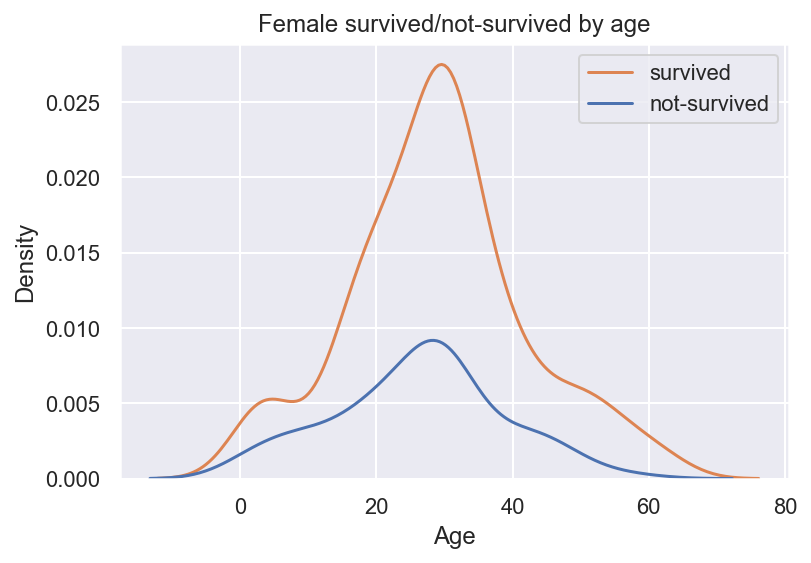

In [36]:
fig, ax = plt.subplots()

sns.kdeplot(x='Age', data=df_female, hue='Survived')
ax.legend(['survived', 'not-survived'])
ax.set_title('Female survived/not-survived by age');

**Correlation matrix**

In [37]:
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",2,35,0,0,373450,8,NaN,S


In [38]:
df_tt = df_tit.copy()
df_tt['1st_class'] = (df_tt['Pclass']==1).astype(int)
df_tt['2nd_class'] = (df_tt['Pclass']==2).astype(int)
df_tt['3nd_class'] = (df_tt['Pclass']==3).astype(int)

df_tt['Female'] = (df_tt['Sex']==1).astype(int)
df_tt['Male'] = (df_tt['Sex']==2).astype(int)

In [39]:
df_tt.drop(columns=['Pclass', 'Sex'], axis=1, inplace=True)
df_tt.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', '1st_class', '2nd_class', '3nd_class',
       'Female', 'Male'],
      dtype='object')

In [40]:
corr_matrix = df_tt.corr()

In [41]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Female         0.543351
1st_class      0.285904
Fare           0.257482
2nd_class      0.093349
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.070324
3nd_class     -0.322308
Male          -0.543351
Name: Survived, dtype: float64

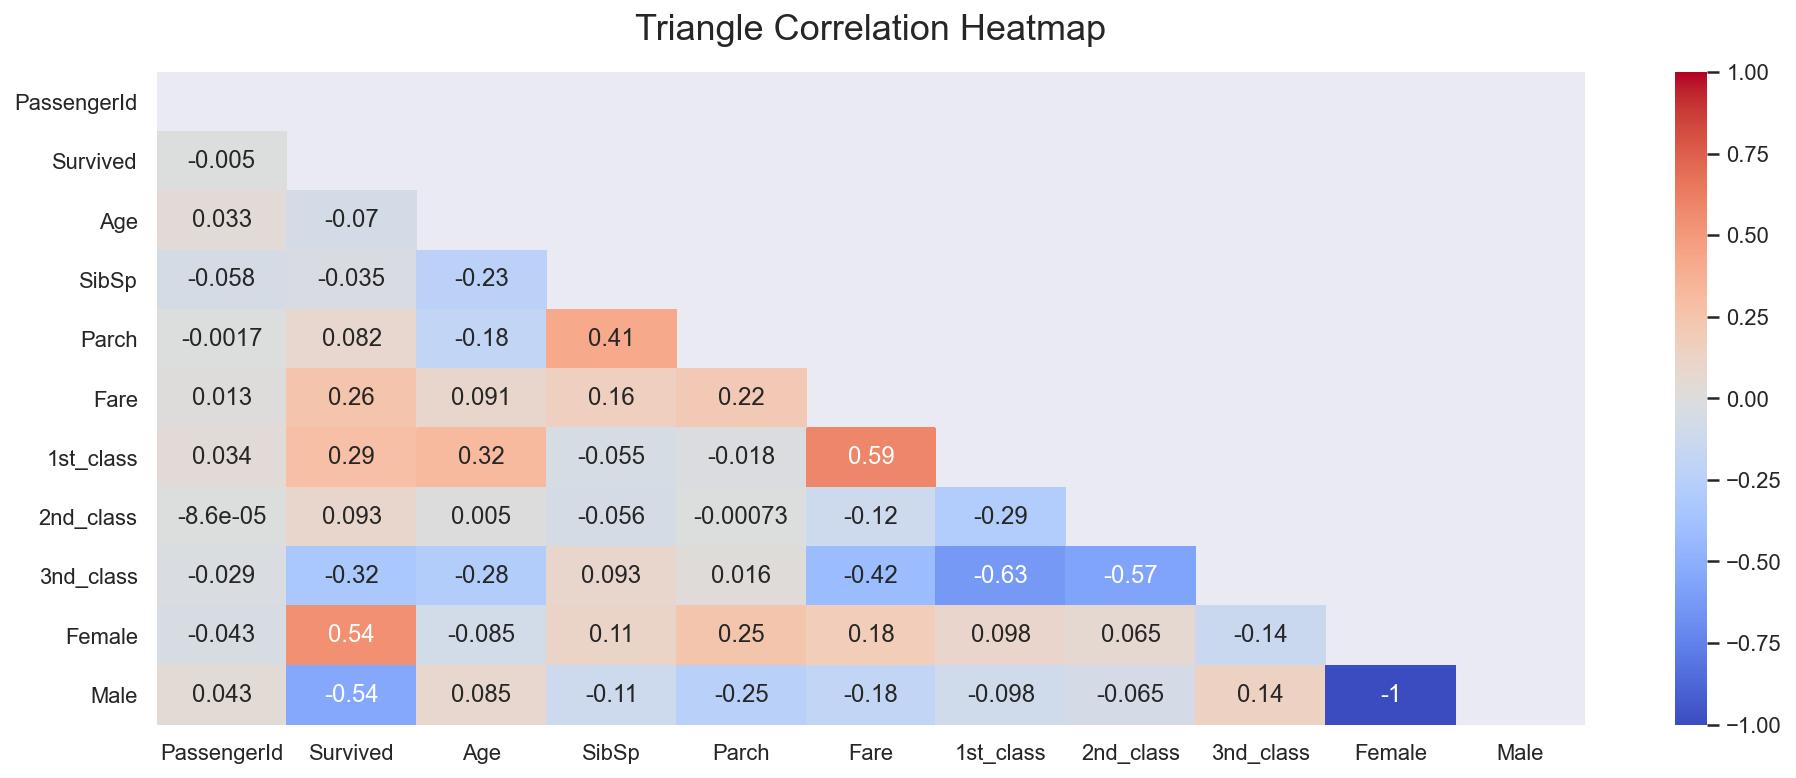

In [42]:
#sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
set_matplotlib_formats('retina')
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df_tt.corr(), dtype=bool))
heatmap = sns.heatmap(df_tt.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

**Transform Data**

In [43]:
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",2,35,0,0,373450,8,NaN,S


In [44]:
# categorical = ['Pclass', Sex', 'Embarked']
# numerical = ['Age', 'SibSp', 'Parch', 'Fare']
# delete = ['Name', 'Ticket', 'Cabin']
# label = ['Survived']


In [45]:
df_tit_X_train = df_tit[['Pclass', 'Sex','Embarked', 'Age', 'SibSp', 'Parch', 'Fare']]

In [46]:
df_tit_y_train = df_tit[['Survived']]

Encode categorical data

In [47]:
df_tit['Embarked'].isnull().values.any()

True

In [48]:
df_tit['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
# impute categorical values with most common value; 
#in this case 2 values for Embarked are missing and need to be imputed
df_tit['Embarked'].fillna('S', inplace = True)
df_tit['Embarked'].isnull().values.any()
        

False

In [50]:
df_tit_cat = df_tit[['Pclass', 'Sex', 'Embarked']]

In [51]:
df_tit_cat.head()

,Pclass,Sex,Embarked
0,3,2,S
1,1,1,C
2,3,1,S
3,1,1,S
4,3,2,S


Simple cat encoding if e.g. two nearby values are more similar than two distant values

In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
ordinal_encoder = OrdinalEncoder()

In [54]:
df_tit_cat_encoded = ordinal_encoder.fit_transform(df_tit_cat)

In [55]:
df_tit_cat_encoded[:5]

array([[2., 1., 2.],
       [0., 0., 0.],
       [2., 0., 2.],
       [0., 0., 2.],
       [2., 1., 2.]])

In [56]:
ordinal_encoder.categories_

[array([1, 2, 3], dtype=int64),
 array([1, 2], dtype=int64),
 array(['C', 'Q', 'S'], dtype=object)]

One-hot categorical encoding if there is no clear similarity of categories

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
cat_encoder = OneHotEncoder()

In [59]:
df_tit_cat_1hot = cat_encoder.fit_transform(df_tit)
df_tit_cat_1hot

<891x2797 sparse matrix of type '<class 'numpy.float64'>'
	with 10692 stored elements in Compressed Sparse Row format>

In [60]:
df_tit_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [61]:
df_tit_cat_1hot.shape

(891, 2797)

In [62]:
cat_encoder.categories_

[array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

**Numerical Data** 

In [63]:
df_tit_num = df_tit[['Age', 'SibSp', 'Parch', 'Fare']]
df_tit_num.isna().sum() # no values in columns missing, no imputation necessary

Age      0
SibSp    0
Parch    0
Fare     0
dtype: int64

**Create Pipeline** 

see also https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [65]:
cat_attribs = ['Pclass', 'Sex', 'Embarked']

In [66]:
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.preprocessing import StandardScaler

In [67]:
cat_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_attribs)])

In [68]:
df_tit_prepared = cat_pipeline.fit_transform(df_tit_cat)
df_tit_prepared.shape

(891, 8)

In [69]:
num_attribs = list(df_tit_num)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [72]:
num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(num_attribs)),
    ('scaler', StandardScaler())])

In [73]:
full_pipeline = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ]
)

**Run Classification**

Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
df_tit_y_train = df_tit_y_train.values.ravel() # turn df into array (with .values) anf flatten array (with .ravel())

log_reg = Pipeline(
    steps=[("preprocessor", full_pipeline), ("classifier", LogisticRegression())]
)

log_reg.fit(df_tit_X_train, df_tit_y_train)
print("model score: %.3f" % log_reg.score(df_tit_X_train, df_tit_y_train))

model score: 0.805


**Test model accuracy**

for logistic regression it is not adviced to use RMSE because gradient decent on sigmoid shaped cost function (binary classification) will not work. Instead cross-validation is advised

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
log_reg_scores = cross_val_score(log_reg, df_tit_X_train, df_tit_y_train, cv=10)
log_reg_scores.mean()

0.7991385767790262

**Random forest classifier**

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
ran_forest = Pipeline(
    steps=[("preprocessor", full_pipeline), ("classifier", RandomForestClassifier())]
)

ran_forest.fit(df_tit_X_train, df_tit_y_train)
print("model score: %.3f" % ran_forest.score(df_tit_X_train, df_tit_y_train))

model score: 0.962


In [80]:
ran_forest_scores = cross_val_score(ran_forest, df_tit_X_train, df_tit_y_train, cv=10)
ran_forest_scores.mean()

0.7991760299625469

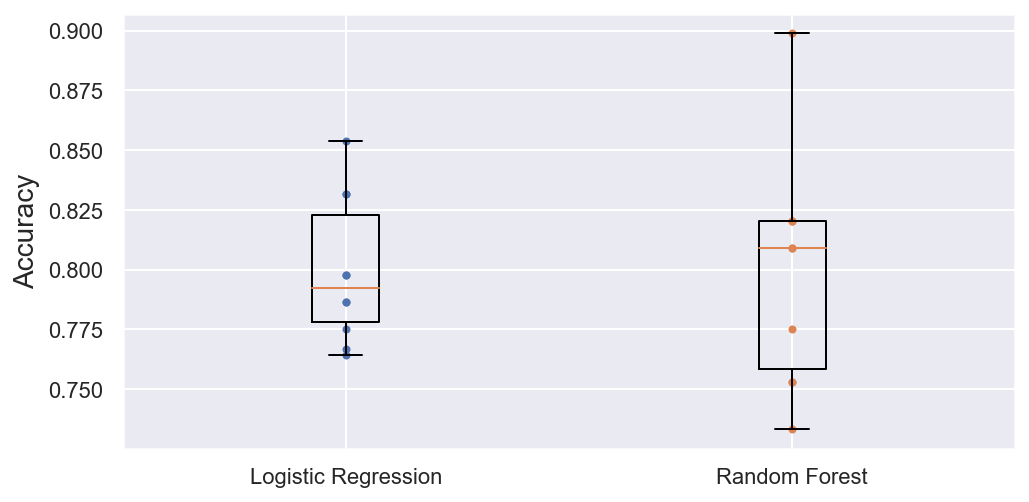

In [81]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, log_reg_scores, ".")
plt.plot([2]*10, ran_forest_scores, ".")
plt.boxplot([log_reg_scores, ran_forest_scores], labels=("Logistic Regression","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

**Adding features**

In [82]:
#adding sum of SibSp and Parch 
df_tit_num = df_tit_num.copy()
df_tit_num['Sum (Parch, SibSp)'] = (df_tit_num['SibSp'] + df_tit_num['Parch'])
df_tit_num.drop(columns=['SibSp', 'Parch'], axis=1, inplace=True)

In [83]:
num_attribs = list(df_tit_num)

In [84]:
df_tit_X_train = df_tit_X_train.copy()
df_tit_X_train = df_tit_X_train.join(df_tit_num['Sum (Parch, SibSp)'])
df_tit_X_train.drop(columns=['SibSp', 'Parch'], axis=1, inplace=True)
df_tit_X_train.head()

,Pclass,Sex,Embarked,Age,Fare,"Sum (Parch, SibSp)"
0,3,2,S,22,7,1
1,1,1,C,38,71,1
2,3,1,S,26,7,0
3,1,1,S,35,53,1
4,3,2,S,35,8,0


In [85]:
num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(num_attribs)),
    ('scaler', StandardScaler())])

In [86]:
full_pipeline = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ]
)

In [87]:
ran_forest = Pipeline(
    steps=[("preprocessor", full_pipeline), ("classifier", RandomForestClassifier())]
)

ran_forest.fit(df_tit_X_train, df_tit_y_train)
print("model score: %.3f" % ran_forest.score(df_tit_X_train, df_tit_y_train))

model score: 0.962


In [88]:
ran_forest_scores = cross_val_score(ran_forest, df_tit_X_train, df_tit_y_train, cv=10)
ran_forest_scores.mean()

0.8047940074906366

**Grid Search**

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
#prepend 'classifier' to grid search params to assign it to the named step in the pipline

param_grid = [
{'classifier__n_estimators': [3, 10, 30], 'classifier__max_features': [2, 4, 6, 8]},
{'classifier__bootstrap': [False], 'classifier__n_estimators': [3, 10], 'classifier__max_features': [2, 3, 4]},
]
grid_search = GridSearchCV(ran_forest, param_grid, cv=5,verbose=3, n_jobs=-1)
grid_search.fit(df_tit_X_train, df_tit_y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('select_numeric',
                                                                                          DataFrameSelector(attribute_names=['Age',
                                                                                                                             'Fare',
                                                                                                                             'Sum '
                                                                                                                             '(Parch, '
                                                                                                                             'SibSp)'])),
                                                                  

In [91]:
grid_search.best_params_

{'classifier__max_features': 6, 'classifier__n_estimators': 30}

In [92]:
grid_search.best_score_

0.8170924612390937

In [93]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(df_tit_X_train)
accuracy_score(df_tit_y_train, y_pred)

0.9562289562289562

In [94]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('select_numeric',
                                                                   DataFrameSelector(attribute_names=['Age',
                                                                                                      'Fare',
                                                                                                      'Sum '
                                                                                                      '(Parch, '
                                                                                                      'SibSp)'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare',
                                      

In [95]:
feature_importances = ran_forest.steps[1][1].feature_importances_

In [96]:
attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2917199586399947, 'Age'),
 (0.20757101014084645, 'Fare'),
 (0.07723295770257535, 'Sum (Parch, SibSp)'),
 (0.05486655930873413, 'Embarked'),
 (0.03128327084031921, 'Pclass'),
 (0.01679541651449226, 'Sex')]

**Final: Model prediction on test data**

In [97]:
df_test = pd.read_csv('test.csv')

In [98]:
df_test = df_test.copy()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
df_tit_X_test = df_test[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']]
df_tit_X_test = df_tit_X_test.copy()
df_tit_X_test['Sum (Parch, SibSp)'] = df_tit_X_test['SibSp'] + df_tit_X_test['Parch']
df_tit_X_test = df_tit_X_test.drop(columns=['SibSp', 'Parch'], axis=1)
df_tit_X_test.head()

,Age,Fare,Pclass,Sex,Embarked,"Sum (Parch, SibSp)"
0,34.5,7.8292,3,male,Q,0
1,47.0,7.0000,3,female,S,1
2,62.0,9.6875,2,male,Q,0
3,27.0,8.6625,3,male,S,0
4,22.0,12.2875,3,female,S,2


In [100]:
col = list(df_tit_X_train)
df_tit_X_test = df_tit_X_test[col]
df_tit_X_test.head()

,Pclass,Sex,Embarked,Age,Fare,"Sum (Parch, SibSp)"
0,3,male,Q,34.5,7.8292,0
1,3,female,S,47.0,7.0000,1
2,2,male,Q,62.0,9.6875,0
3,3,male,S,27.0,8.6625,0
4,3,female,S,22.0,12.2875,2


In [101]:
df_tit_X_test['Sex']= df_tit_X_test['Sex'].replace(['female','male'],[1,2])

In [104]:
df_tit_X_test.isnull().any()

Pclass                False
Sex                   False
Embarked              False
Age                    True
Fare                   True
Sum (Parch, SibSp)    False
dtype: bool

In [105]:
transformer = ColumnTransformer(
[('imp_col_age', SimpleImputer(strategy='mean'), [3])])

In [106]:
df_tit_X_test['Age'] = pd.DataFrame(transformer.fit_transform(df_tit_X_test))

In [107]:
transformer = ColumnTransformer(
[('imp_col_fare', SimpleImputer(strategy='mean'), [4])])

In [108]:
df_tit_X_test['Fare'] = pd.DataFrame(transformer.fit_transform(df_tit_X_test))

In [109]:
df_tit_X_test.isnull().any()

Pclass                False
Sex                   False
Embarked              False
Age                   False
Fare                  False
Sum (Parch, SibSp)    False
dtype: bool

In [116]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(df_tit_X_test)
final_predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [125]:
final_predictions.shape

(418,)

In [113]:
len(df)

891

In [114]:
len(df_test)

418

In [128]:
passenger_id = list(range(892, 892+len(df_test)))

In [130]:

data = {'PassengerId':passenger_id,
        'Survived':final_predictions}

final_df = pd.DataFrame(data)
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [134]:
final_df.to_csv('titanic_predictions.csv', index=False, sep='\t', encoding='utf-8')